<a href="https://colab.research.google.com/github/Balajih1994/Customer-Segmentation-using-aggloromerative-clustering/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

In [116]:
data = pd.read_csv('customer.csv')

In [117]:
data.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [118]:
data.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                  int64
dtype: object

In [119]:
data['Sex'] = data['Sex'].astype('object')

In [120]:
data.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                 object
dtype: object

In [121]:


df_cust = data.drop('Cust_Number',axis=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


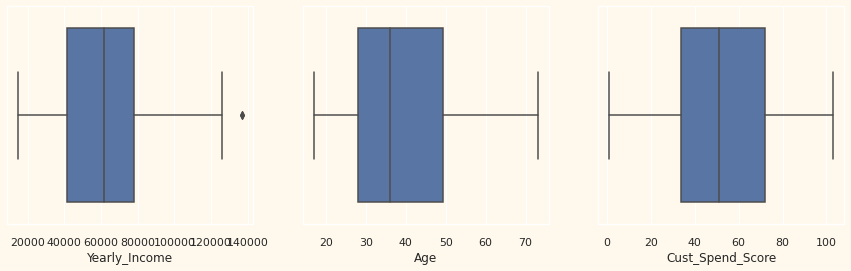

In [122]:
df_num = df_cust.drop(['Sex'], axis = 1)

# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_cust[variable], ax = subplot)

# display the plot
plt.show()

In [123]:
df_cust = df_cust[df_cust['Yearly_Income'] < 130000]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


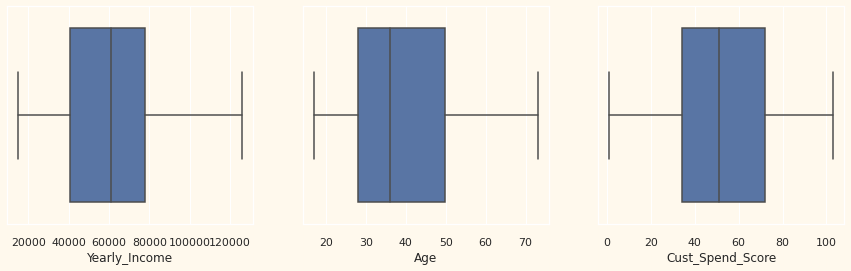

In [124]:
df_num = df_cust.drop(['Sex'], axis = 1)

# plot the boxplot for each numerical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 4))

# use for loop to plot the boxplot for each variable
for variable, subplot in zip(df_num.columns, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df_cust[variable], ax = subplot)

# display the plot
plt.show()

In [125]:
Total = df_cust.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_cust.isnull().sum()*100/df_cust.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Yearly_Income,0,0.0
Age,0,0.0
Cust_Spend_Score,0,0.0
Sex,0,0.0


In [126]:
X_filtered = df_cust[['Cust_Spend_Score', 'Yearly_Income']]

# print top 5 observations of X
X_filtered.head()

,Cust_Spend_Score,Yearly_Income
0,44,15000
1,79,15000
2,8,16000
3,79,16000
4,41,17000


In [127]:
X_norm = StandardScaler()

# normalize all the columns of the dataframe 'X_filtered'
num_norm = X_norm.fit_transform(X_filtered)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_norm, columns = X_filtered.columns)

X.head()

,Cust_Spend_Score,Yearly_Income
0,-0.283684,-1.779171
1,1.068399,-1.779171
2,-1.674398,-1.739447
3,1.068399,-1.739447
4,-0.399577,-1.699723


In [135]:
scaler = StandardScaler()

# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# name the standardized data as 'features_scaled'
features_scaled = scaler.fit_transform(X)
features_scaled[:10]

array([[-0.28368382, -1.77917141],
       [ 1.06839932, -1.77917141],
       [-1.67439791, -1.73944701],
       [ 1.06839932, -1.73944701],
       [-0.39957666, -1.69972262],
       [ 1.14566121, -1.69972262],
       [-1.67439791, -1.65999822],
       [ 1.80238731, -1.65999822],
       [-1.94481453, -1.62027383],
       [ 0.7207208 , -1.62027383]])

In [138]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[6.00000000e+01 6.10000000e+01 0.00000000e+00 2.00000000e+00]
 [7.50000000e+01 8.40000000e+01 0.00000000e+00 2.00000000e+00]
 [1.06000000e+02 1.10000000e+02 0.00000000e+00 2.00000000e+00]
 [1.11000000e+02 2.00000000e+02 0.00000000e+00 3.00000000e+00]
 [1.14000000e+02 1.15000000e+02 0.00000000e+00 2.00000000e+00]
 [7.70000000e+01 8.30000000e+01 0.00000000e+00 2.00000000e+00]
 [7.80000000e+01 8.50000000e+01 0.00000000e+00 2.00000000e+00]
 [1.50000000e+02 1.54000000e+02 0.00000000e+00 2.00000000e+00]
 [1.51000000e+02 1.55000000e+02 0.00000000e+00 2.00000000e+00]
 [1.29000000e+02 1.31000000e+02 3.86309468e-02 2.00000000e+00]]


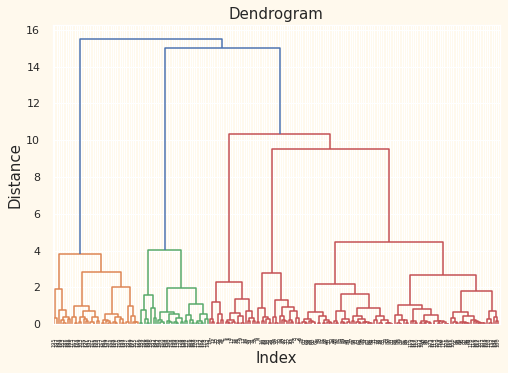

In [139]:
# plot the dendrogram
# pass the linkage matrix
dendro = dendrogram(link_mat)

# annotate the distance on the y-axis for distance > 20
# 'dendro' returns thec dictionary containing x,y coordinates and the color list for each merge
# the 'icoord' returns the x-coordinates for the rectangle that represents the merging
# the 'dcoord' returns the y-coordinates (distance) for the each corner of the rectangle that represents the merging


# plot the line to cut the dendrogram
plt.axhline(y = 100)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

# display the plot
plt.show()

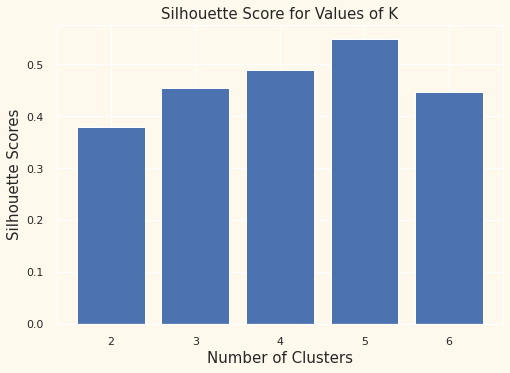

In [144]:
K = [2,3,4,5,6]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, model.fit_predict(features_scaled))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

In [145]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=5, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering(n_clusters=5)

In [148]:
df_cust['Cluster'] = clusters.labels_

# print head() of the newly formed dataframed
df_cust.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
0,15000,18,44,0,4
1,15000,18,79,0,3
2,16000,23,8,1,4
3,16000,25,79,1,3
4,17000,32,41,1,4


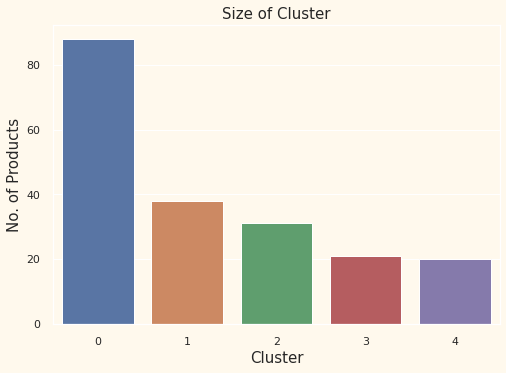

In [150]:
sns.countplot(data = df_cust, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

# display the plot
plt.show()

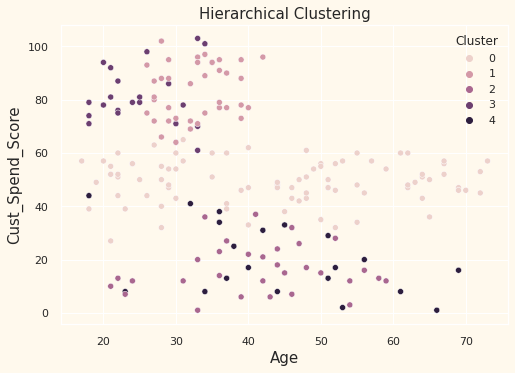

In [154]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'Age', y = 'Cust_Spend_Score', data = df_cust, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Cust_Spend_Score', fontsize = 15)

# display the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


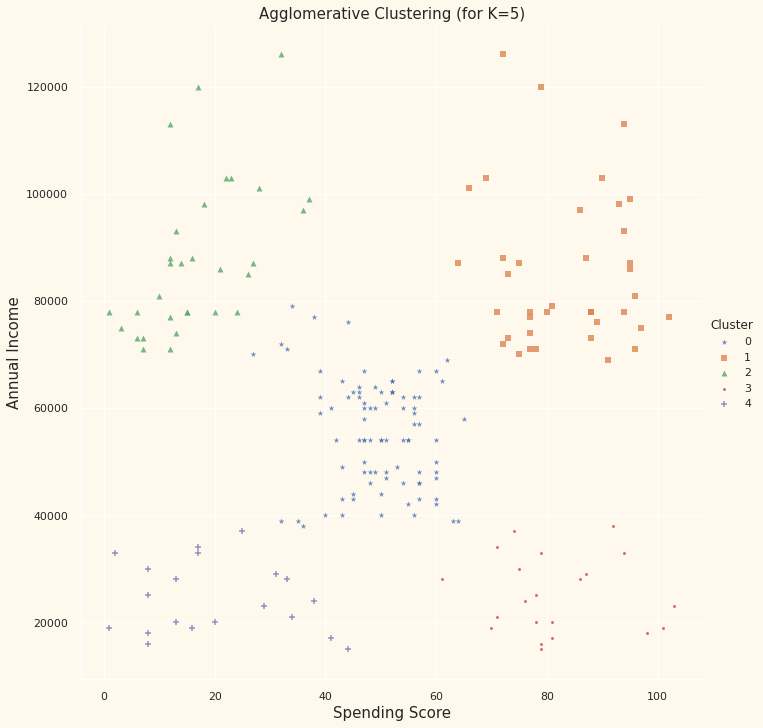

In [157]:


sns.lmplot(x = 'Cust_Spend_Score', y = 'Yearly_Income', data = df_cust, hue = 'Cluster', 
                markers = ['*', ',', '^', '.', '+'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Agglomerative Clustering (for K=5)', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 15)
plt.ylabel('Annual Income', fontsize = 15)

# display the plot
plt.show()